In [1]:
# general imports
import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal

In [2]:
# audio reading and writing
from scipy.io.wavfile import read as wavread
import pydub
import wave

In [3]:
# use some things to normalize
from torch import FloatTensor
from torch.nn.functional import normalize as torchnorm

# vecs = np.random.rand(3, 16, 16, 16)
# norm_vecs = normalize(FloatTensor(vecs), dim=0, eps=1e-16).numpy()

In [4]:
#graphical libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()
# %matplotlib inline

In [5]:
SAMPLES = 500

In [6]:
npwavread = wavread("/home/leo/Music/lucaStragnoli-FeelGoodINC.wav")

In [7]:
npwavread

(44100, array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int16))

In [8]:
resampled = sp.signal.resample(npwavread[1], SAMPLES)

In [9]:
resampled.shape

(500, 2)

In [10]:
yl = np.abs(np.transpose(resampled)[0])
yr = np.abs(np.transpose(resampled)[1])
x = np.linspace(0,2*np.pi, SAMPLES)

In [11]:
yl.shape, yr.shape, x.shape

((500,), (500,), (500,))

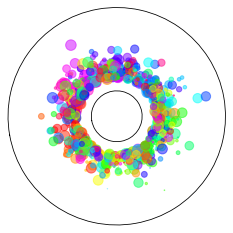

In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
r = 2 * np.random.rand(SAMPLES)
theta = 2 * np.pi * np.random.rand(SAMPLES)
area = 30 * r**2
colors = theta

fig = plt.figure()

# fig.get_xaxis().set_visible(False)
# fig.axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(111, projection='polar')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
c = ax.scatter(theta, yl+10, c=colors, s=area, cmap='hsv', alpha=0.5)
d = ax.scatter(theta, yr+10, c=list(reversed(colors)), s=area, cmap='hsv', alpha=0.5)
ax.set_rorigin(-20)
ax.set_theta_zero_location('W', offset=10)

In [13]:
ax.get_window_extent()

In [14]:
plt.savefig("test3.png")

<Figure size 432x288 with 0 Axes>

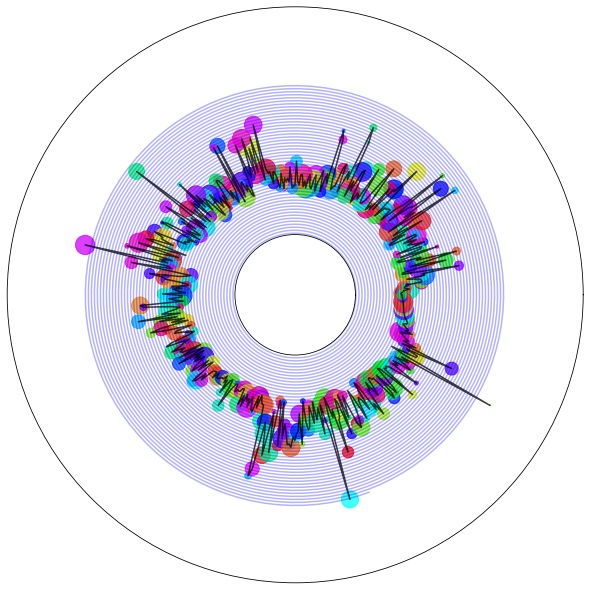

In [15]:
np.random.seed(19680801)

# Compute areas and colors
r = 2 * np.random.rand(SAMPLES)
theta = 2 * np.pi * np.random.rand(SAMPLES)
area = 100 * r**2
colors = theta

r2 = np.arange(0, 50, 0.01)
th2 = 2 * np.pi * r2

fig = plt.figure()


# ax = fig.add_subplot(111, projection='polar')
ax = fig.add_axes([00.0, 0.0, 2., 2.], polar=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.plot(th2-20,r2, 'b', alpha=0.3)
ax.plot(x, yl+15, 'k', alpha=0.75)
c = ax.scatter(x, yl+15, c=colors, s=area, cmap='hsv', alpha=0.75)

ax.set_rorigin(-20)
# ax.set_theta_zero_location('W', offset=10)


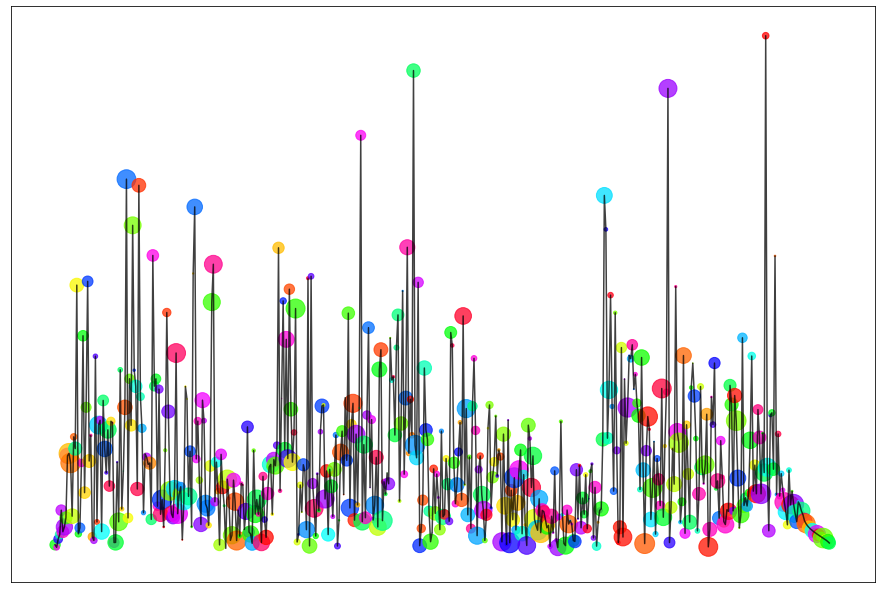

In [16]:
np.random.seed(19680802)

# Compute areas and colors
r = 2 * np.random.rand(SAMPLES)
theta = 2 * np.pi * np.random.rand(SAMPLES)
area = 100 * r**2
colors = theta

r2 = np.arange(0, 50, 0.01)
th2 = 2 * np.pi * r2

fig = plt.figure()


# ax = fig.add_subplot(111, projection='polar')
# ax = fig.add_axes([00.0, 0.0, 2., 2.], polar=True)
ax = fig.add_axes([00.0, 0.0, 2., 2.])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# ax.plot(th2-20,r2, 'b', alpha=0.3)
ax.plot(x, yl+15, 'k', alpha=0.75)
c = ax.scatter(x, yl+15, c=colors, s=area, cmap='hsv', alpha=0.75)

# ax.set_rorigin(-20)
# ax.set_theta_zero_location('W', offset=10)


In [17]:
# color maps trials

cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']


cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']


cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']



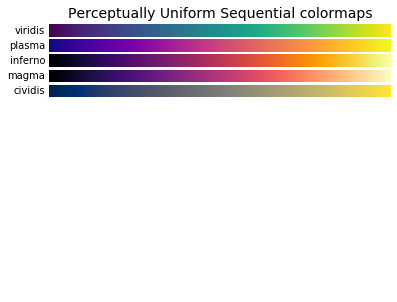

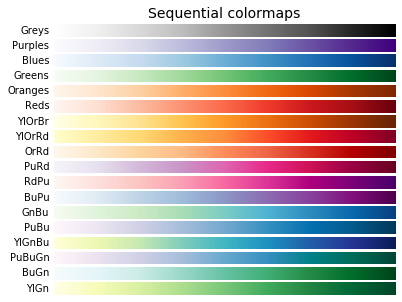

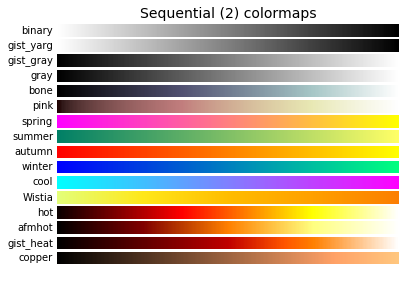

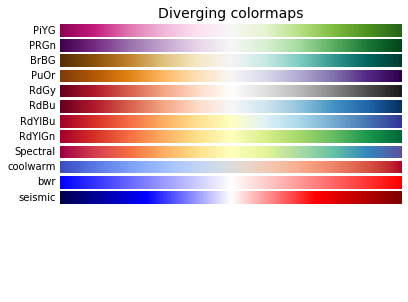

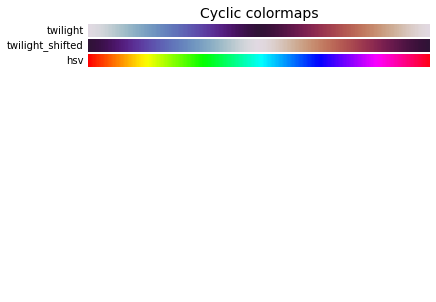

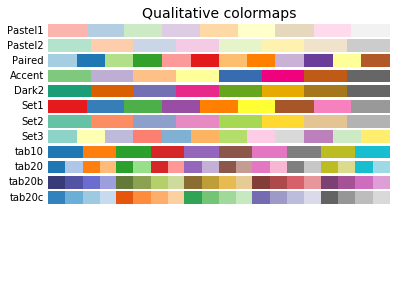

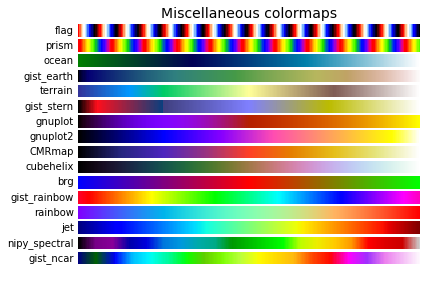

In [18]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

In [19]:
cmap = plt.get_cmap('gnuplot', SAMPLES)

In [20]:
cmap =  plt.get_cmap('plasma', SAMPLES).colors

In [21]:
cmap

array([[0.050383, 0.029803, 0.527975, 1.      ],
       [0.050383, 0.029803, 0.527975, 1.      ],
       [0.063536, 0.028426, 0.533124, 1.      ],
       ...,
       [0.941896, 0.96859 , 0.140956, 1.      ],
       [0.940015, 0.975158, 0.131326, 1.      ],
       [0.940015, 0.975158, 0.131326, 1.      ]])

In [22]:
np.array(cmap).shape

(500, 4)

<BarContainer object of 500 artists>

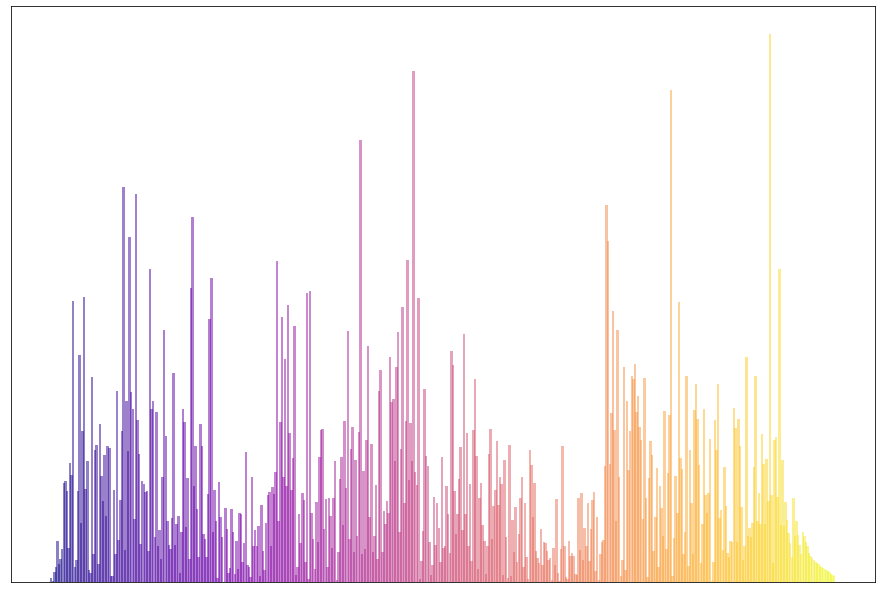

In [23]:
# np.random.seed(19680802)

# Compute areas and colors
r = 2 * np.random.rand(SAMPLES)
theta = 2 * np.pi * np.random.rand(SAMPLES)
area = 100 * r**2
colors = theta

r2 = np.arange(0, 50, 0.01)
th2 = 2 * np.pi * r2

fig = plt.figure()


# ax = fig.add_subplot(111, projection='polar')
# ax = fig.add_axes([00.0, 0.0, 2., 2.], polar=True)
ax = fig.add_axes([00.0, 0.0, 2., 2.])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# ax.plot(th2-20,r2, 'b', alpha=0.3)
ax.bar(x, yl, alpha=0.5, width=0.02,  color=cmap)
# c = ax.scatter(x, yl+15, c=colors, s=area, cmap='hsv', alpha=0.75)


In [24]:
def img_add_subplot(fig, x, y, colormap, title=None, plottype="bar",
                    pos=111, alpha=0.75, width=0.015,
                    projection="rectilinear", polar_origin=-50):
    """

    :param fig:  figure object to use where to add the subplot
    :param x: x values (or radial values if polar)
    :param y: values to plot will add as many as channels there are here
    :param colormap: colormap with the same size as x
    :param title: title of the subplot
    :param plottype: type of plot, default is barplot
    :param pos: size and position of the subplot in matplotlib format()
    :param alpha: transparency
    :param width: with for bars
    :param projection: value between: [u'aitoff', u'hammer', u'lambert', u'mollweide', u'polar', u'rectilinear'].
    :param polar_origin: origin displacement for polar graphs
    :return: adds the subplot to the given figure
    """
    # print(x.shape, y.shape, colormap.shape)
    for yv in y:
        ax = fig.add_subplot(pos, projection='polar')
        if title:
            ax.title.set_text(title)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        if plottype == "bar":
            ax.bar(x, yv, alpha=alpha, width=width, color=colormap)
        elif plottype == "scatter":
            ax.scatter(x, yv, alpha=alpha, width=width, color=colormap)
        else:
            ax.plot(x, yv, alpha=alpha, width=width, color=colormap)
        if projection == "polar":
            ax.set_rorigin(polar_origin)


/home/leo/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


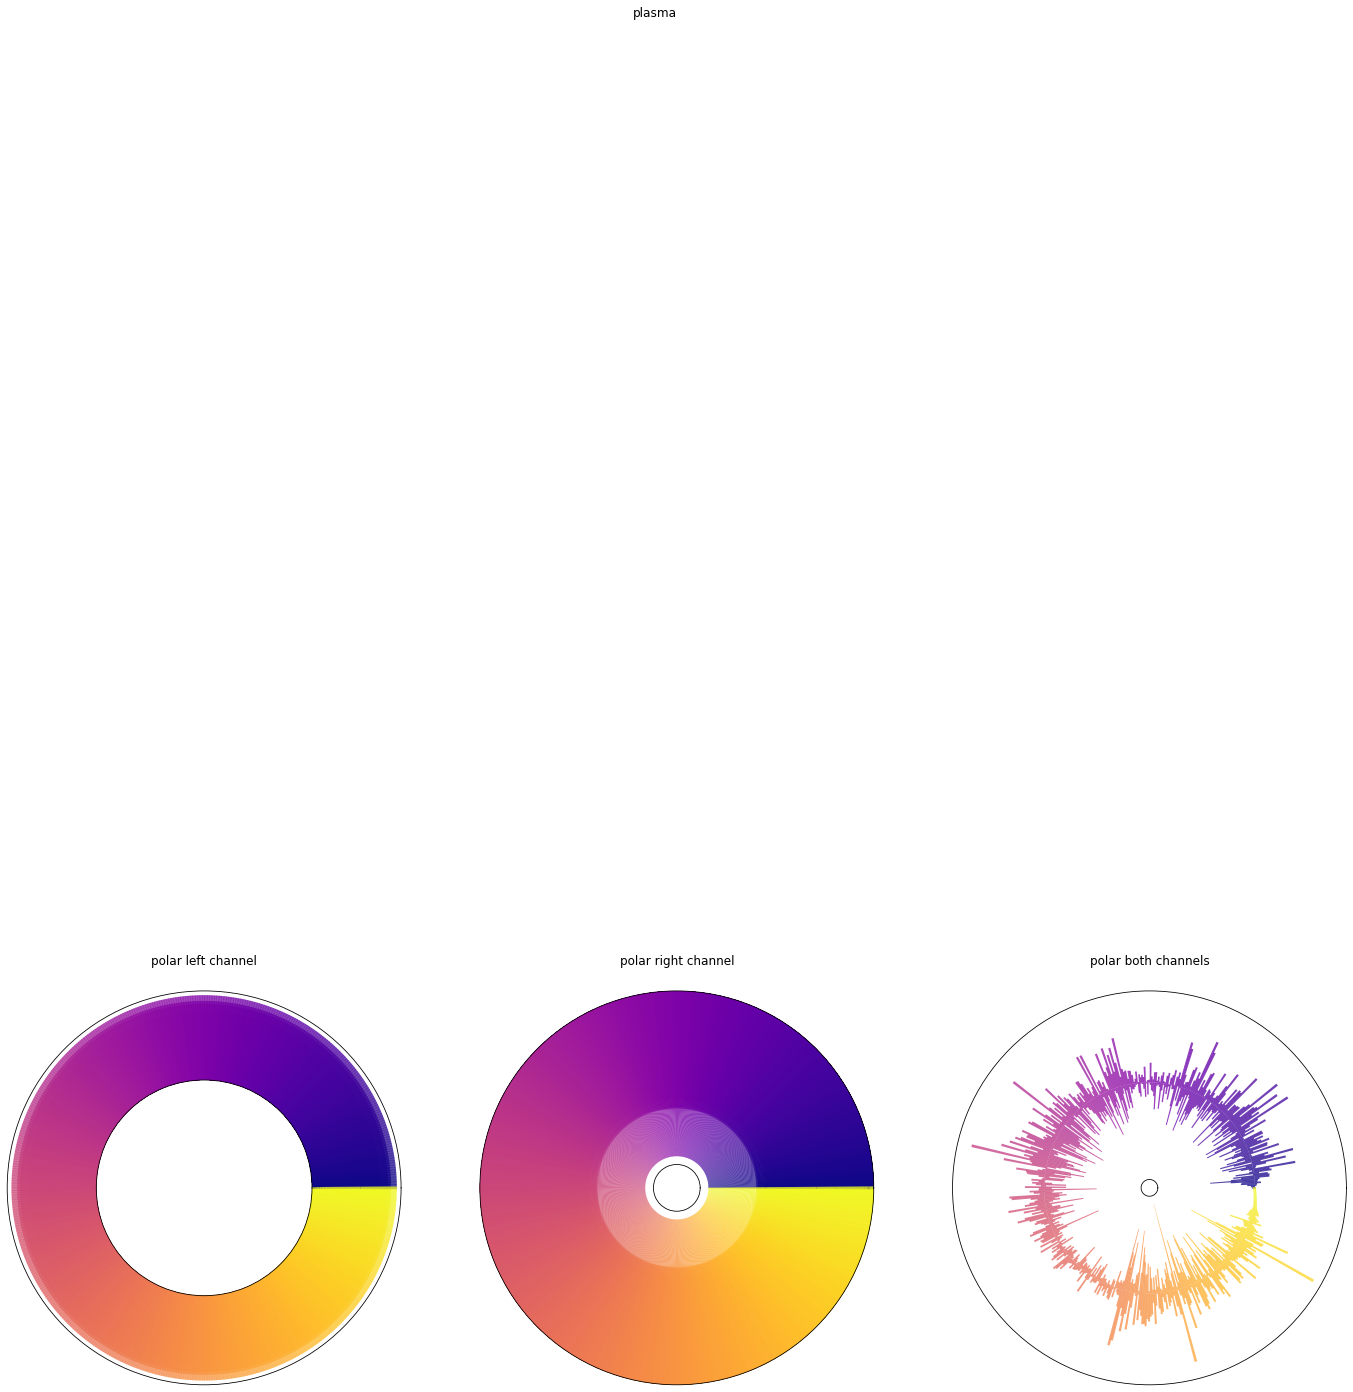

In [25]:
fig = plt.figure(figsize=(24,24))
fig.suptitle("plasma")

# img_add_subplot(fig,x,yl,cmap,"linear left channel", pos=231)
# img_add_subplot(fig,x,-yr,cmap,"linear right channel", pos=232)
# img_add_subplot(fig,x,[yl,-yr],cmap,"linear both channels", pos=233)

img_add_subplot(fig,x,yl,cmap,"polar left channel", projection="polar", pos=234)
img_add_subplot(fig,x,-yr,cmap,"polar right channel", projection="polar", pos=235)
img_add_subplot(fig,x,[yl,-yr],cmap,"polar both channels", projection="polar", pos=236)


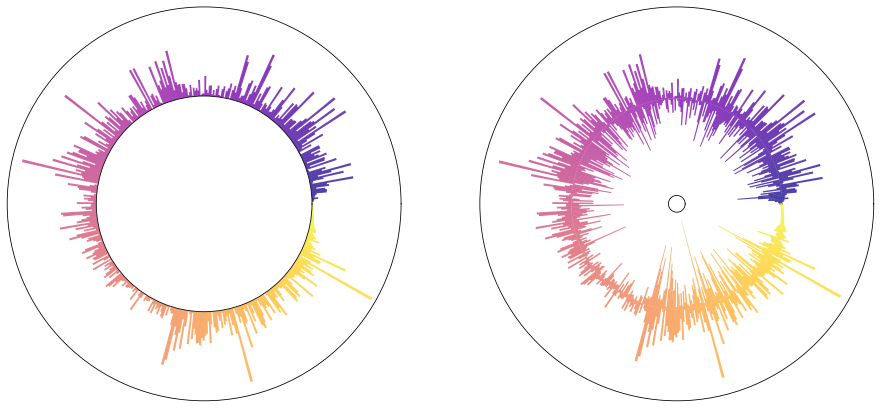

In [26]:
# np.random.seed(19680802)

# Compute areas and colors
r = 2 * np.random.rand(SAMPLES)
theta = 2 * np.pi * np.random.rand(SAMPLES)
area = 100 * r**2
colors = theta

r2 = np.arange(0, 50, 0.01)
th2 = 2 * np.pi * r2

fig = plt.figure(figsize=(24,24))


ax = fig.add_subplot(2,3,1, projection='polar')
# ax = fig.add_axes([00.0, 0.0, 2., 2.], polar=True)
# ax = fig.add_axes([00.0, 0.0, 2., 2.])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# ax.plot(th2-20,r2, 'b', alpha=0.3)
ax.bar(x, yl, alpha=0.75, width=0.015,  color=cmap)
# c = ax.scatter(x, yl+15, c=colors, s=area, cmap='hsv', alpha=0.75)
ax.set_rorigin(-50)
# ax.set_theta_zero_location('W', offset=10)
ax2 = fig.add_subplot(2,3,2, projection='polar')
# ax = fig.add_axes([00.0, 0.0, 2., 2.], polar=True)
# ax = fig.add_axes([00.0, 0.0, 2., 2.])
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
# ax.plot(th2-20,r2, 'b', alpha=0.3)
ax2.bar(x, yl, alpha=0.75, width=0.015,  color=cmap)
ax2.bar(x, -yr, alpha=0.75, width=0.015,  color=cmap)
# c = ax.scatter(x, yl+15, c=colors, s=area, cmap='hsv', alpha=0.75)
ax2.set_rorigin(-50)


In [27]:
for v in np.transpose(cmap[:10,:]):
    print (v)

[0.050383 0.050383 0.063536 0.063536 0.075353 0.075353 0.086222 0.086222
 0.096379 0.096379]
[0.029803 0.029803 0.028426 0.028426 0.027206 0.027206 0.026125 0.026125
 0.025165 0.025165]
[0.527975 0.527975 0.533124 0.533124 0.538007 0.538007 0.542658 0.542658
 0.547103 0.547103]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
import itertools

all_cmaps = list(itertools.chain(*cmaps.values()))

In [1]:
# cmaps


In [30]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [31]:
import os, sys

In [32]:
os.cpu_count()

8

In [33]:
# n = 8
# chunks = [cmaps[i:i + n] for i in range(0, len(cmaps), n)]

chunks(all_cmaps, 8)

<generator object chunks at 0x7f77e67c1a20>

In [2]:
# list(chunks(all_cmaps, 8))

In [35]:
clmp = plt.get_cmap('gnuplot', SAMPLES)


In [36]:
clmp(np.linspace(0,1,10))

array([[0.        , 0.        , 0.        , 1.        ],
       [0.33199464, 0.00133902, 0.63849059, 1.        ],
       [0.47164064, 0.01100696, 0.98504973, 1.        ],
       [0.57677147, 0.03681482, 0.86811636, 1.        ],
       [0.66700058, 0.08805566, 0.33938943, 1.        ],
       [0.74505719, 0.17105575, 0.        , 1.        ],
       [0.81690554, 0.29718786, 0.        , 1.        ],
       [0.88179085, 0.47010356, 0.        , 1.        ],
       [0.94328127, 0.7044453 , 0.        , 1.        ],
       [1.        , 1.        , 0.        , 1.        ]])

In [37]:
len(all_cmaps)

82

In [38]:
6 * 82 * 30 / 3600.

4.1

In [39]:

def create_sample_tile(wavfile, outpath, colornames, title=None, nsamples=500, figsize=(16, 16),
                       plottypes=("bar",), projections=(u'polar', u'rectilinear'),
                       left_channel=True, right_channel=True
                       ):
    """
    :param left_channel:
    :param right_channel:
    :param plottypes:
    :param projections:
    :param wavfile:
    :param outpath:
    :param colornames:
    :param title:
    :param nsamples:
    :param figsize:
    :return:
    """
    _, wav = load_wav(wavfile)  # drop sampling rate as I don't need it

    swav_polar, x_polar = resample(wav, nsamples=nsamples, abs=False, max_val=2 * np.pi)
    swav_lin, x_lin = resample(wav, nsamples=nsamples, abs=False, max_val=nsamples)

    y = np.abs(np.transpose(swav_lin))
    y[1, :] *= -1
    # compute the shape of the output
    mult = 1
    if left_channel and right_channel:
        mult = 3
    nsubplots = mult * len(projections) * len(plottypes)
    vert = int(np.sqrt(nsubplots))
    hor = int(np.ceil(np.sqrt(nsubplots)))
    base_pos = 100 * vert + 10 * hor

    for cname in colornames:
        try:
            print("starting graph file for ", cname)
            fig = plt.figure(figsize=figsize)
            figtitle = "" if not title else title
            figtitle = figtitle + " " + cname
            fig.suptitle(figtitle)

            cmap = plt.get_cmap(cname, nsamples)

            splt_count = 1
            for plottype in plottypes:
                for proj in projections:
                    x = x_lin
                    if proj == "polar":
                        x = x_polar
                    try:
                        cmap = cmap.colors
                    except:
                        cmap = cmap(x)
                    # add only the absolute values if not there are too many sample images
                    # TODO take out repeated code and replace by function, left like this by lazyness
                    if left_channel:
                        try:
                            print("processing tile {} of {} in pos {} for example {}".format(splt_count, nsubplots,
                                                                                             base_pos + splt_count,
                                                                                             cname))
                            img_add_subplot(fig, x, y[0], pos=base_pos + splt_count,
                                            title=plottype + " " + proj + " " + str(splt_count),
                                            colormap=cmap)
                            splt_count += 1
                        except Exception as e:
                            print("processing tile {} of {} in pos {} for example {}".format(splt_count, nsubplots,
                                                                                             base_pos + splt_count,
                                                                                             cname), cname,
                                  "with error: ", e)
                    if right_channel:
                        try:
                            print("processing tile {} of {} in pos {} for example {}".format(splt_count, nsubplots,
                                                                                             base_pos + splt_count,
                                                                                             cname))
                            img_add_subplot(fig, x, y[1], pos=base_pos + splt_count,
                                            title=plottype + " " + proj + " " + str(splt_count),
                                            colormap=cmap)
                            splt_count += 1
                        except Exception as e:
                            print("processing tile {} of {} in pos {} for example {}".format(splt_count, nsubplots,
                                                                                             base_pos + splt_count,
                                                                                             cname),
                                  cname, "with error: ", e)
                    if left_channel and right_channel:
                        try:
                            print("processing tile {} of {} in pos {} for example {}".format(splt_count, nsubplots,
                                                                                             base_pos + splt_count,
                                                                                             cname))
                            img_add_subplot(fig, x, y, pos=base_pos + splt_count,
                                            title=plottype + " " + proj + " " + str(splt_count),
                                            colormap=cmap)
                            splt_count += 1
                        except Exception as e:
                            print("processing tile {} of {} in pos {} for example {}".format(splt_count, nsubplots,
                                                                                             base_pos + splt_count,
                                                                                             cname),
                                  cname, "with error: ", e)
            # saving figure
            outfname = outpath + cname + ".png"
            print("saving figure", outfname)
            plt.savefig(outfname, fig)
            plt.close(fig)
        except Exception as e:
            print("failed trying figure for color ", cname, "with error: ", e)
